# Aula 11 - Preparatório para a aula de Físico, Engenharia e Matemática - Parte 3 : Sympy


### Exercicios utilizando Sympy


In [90]:
import numpy as np
import scipy as smp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

Quando Utilizamos o Sympy, podemos representar a variaveis como simbolos matematicos.

In [149]:
x = smp.symbols('x')
x**2

x**2

E com isso podemos representa-los como funções que ao inves de retornar uma valore, retorna-se os simbolos das equações:

In [150]:
x,y = smp.symbols('x y')
f =x**3+y
f

x**3 + y

Podendo assim substitui-los com valores : 

In [93]:
f.subs(x,4)

y + 64

Podemos representar simbolos algebricos e trigonometricos :

In [94]:
smp.sin(x)

sin(x)

In [95]:
smp.asin(x)

asin(x)

In [96]:
#Log na base 10
smp.log(x,10)

log(x)/log(10)

O Sympy permite tambem controlar como queremos que seja representado os elementos dos simbolos :


In [97]:
x**(3/2)

x**1.5

In [98]:
x**(smp.Rational(3/2))

x**(3/2)

Pode salvar expressões em novas variáveis

In [99]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Fazer operações sobre as novas variáveis:

In [100]:
z = y**2
z

(x**2 + 4*x + 3)**2

Note-se que não se expande. Há diferentes métodos a que se deve recorrer para fazer coisas diferentes com a expressão:

In [146]:
z.factor()

(x + 1)**2*(x + 3)**2

Na notação `smp.solve(f,x)`, sympy encontra o valor de $x$ que faz $f(x)=0$. 

In [151]:
smp.solve(z,x)

[-3, -1]

Ou substitui por um valor desejado:

In [152]:
smp.solve(smp.sin(x), x)

[0, pi]

**Bom Prática***: Se sabe que a sua variável $x$ é real (e em alguns casos não negativa) é bom especificar isto quando define as suas variáveis para evitar problemas complicados ao resolver problemas complicados (especialmente com integrais).

In [153]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

[-I, I]

In [154]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x+4, x)

[]

Pode definir muitas variáveis ao mesmo tempo

In [155]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Pode também resolver expressões multivariadas, especificando para que variável queremos resolver. Em cada caso, $F=0$ está a ser resolvido para:

* $x$

In [157]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

* $y$

In [158]:
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

* $z$

In [159]:
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finalmente, pode acontecer que alguém tenha uma expressão do Sympy mas queira convertê-la numa função numérica para que possa  avaliar o resultado:


In [160]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

Passando valor para $x = 1$ e $y = 2$:

In [161]:
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)

3.6651914291880923

Plotando com $y = 2$

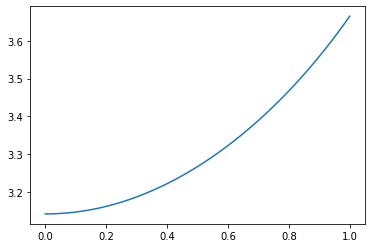

In [162]:
x_num = np.linspace(0,1,100)
y_num = 2
plt.plot(x_num, expr_f(x_num,y_num))
plt.show()

# Limites


Como mostrado anteriormente definimos a equação utilizando o modulo do Sympy:

In [101]:
smp.sin(x/2+ smp.sin(x))

sin(x/2 + sin(x))

Para utilizar o limite passamos os parametros:
```python
    smp.Limit(<função>, Termo analisado , Tendencia a aproxima )
```

Exemplo:

In [102]:
smp.Limit(smp.sin(x/2+ smp.sin(x)),x,smp.pi)

Limit(sin(x/2 + sin(x)), x, pi)

Para que possamos saber o resultado do limite ou de outras funções, utilizamos o metodo `doit()`

In [103]:
smp.Limit(smp.sin(x/2+ smp.sin(x)),x,smp.pi).doit()

1

Caso queremos analiser em qual direção existe a tendencia, podemos passar mais um paremtro `dir = '+'` ou `dir = '-'`

In [104]:
smp.Limit(2*smp.exp(1/x)/(smp.exp(1/x)+1),x,0,dir='+')

Limit(2*exp(1/x)/(exp(1/x) + 1), x, 0)

In [105]:
smp.Limit(2*smp.exp(1/x)/(smp.exp(1/x)+1),x,0,dir='+').doit()

2

In [106]:
smp.Limit(2*smp.exp(1/x)/(smp.exp(1/x)+1),x,0,dir='-')

Limit(2*exp(1/x)/(exp(1/x) + 1), x, 0, dir='-')

In [107]:
smp.Limit(2*smp.exp(1/x)/(smp.exp(1/x)+1),x,0,dir='-').doit()

0

Quando queremos saber a tendencia ao infinito é necessario utilizar `smp.oo`

In [108]:
smp.Limit(((smp.cos(x)-1))/x,x,smp.oo)

Limit((cos(x) - 1)/x, x, oo, dir='-')

In [109]:
smp.Limit(((smp.cos(x)-1))/x,x,smp.oo).doit()

0

# Derivadas

$$\dfrac {d}{dx} \left(\dfrac{1+sin(x)}{1-cos(x)^2}\right)^2$$

In [110]:
smp.diff(((1+smp.sin(x))/(1-smp.cos(x)))**2)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$\dfrac {d}{dx} \left(\log_{5}(x)\right)^\frac{x}{2}$$

In [111]:
#Rational nao funciona no smp no log
smp.diff(smp.log(x,5)**(x/2),x)

(log(x)/log(5))**(x/2)*(log(log(x)/log(5))/2 + 1/(2*log(x)))

$$\dfrac {d}{dx} f \left(x+g(x)\right)$$

In [112]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)
f

f(x + g(x))

In [113]:
smp.diff(f,x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

# Integral
Lembrando que esse prcesso de antidervada devira acompanhar +c , no python nao adiciona. Entao se for indetermianda deve adicionar +c
 

$$\int csc(x)cot(x)dx$$

In [114]:
smp.integrate(smp.csc(x)*smp.cot(x),x)

-1/sin(x)

$$\int 4sec(3x)tan(3x)dx$$

In [115]:
smp.integrate(4*smp.sec(3*x)*smp.tan(3*x),x)

4/(3*cos(3*x))

$$\int \left(\dfrac{2}{\sqrt{1-x^2}} \dfrac{1}{ x^{1/4}}\right)dx$$

In [116]:
smp.integrate(2/smp.sqrt(1-x**2)-1/x**smp.Rational(1,4),x)

-4*x**(3/4)/3 + 2*asin(x)

1. Dado $\dfrac{dy}{dx} = 8x +csc^2(x)$ com $y(\pi/2) = -7$ resolva para $y(x)$ 

Para saber qual funçao é $y(x)$ devemos integrar

In [117]:
integral = smp.integrate(8*x+smp.csc(x)**2,x)

In [118]:
integral

4*x**2 - cos(x)/sin(x)

Mas qual seria o + C? 
A proxima linha de codigo , mostra a substituição:
1. Para que descobrimos o vamor exato de +C pela substituição devemos somar com seu valor negativo $(a +(-a)= 1)$
2. Mas a condição inicial diz que a condição inicial é igual a $y(\pi/2) = -7$

In [119]:
C = - integral.subs(x, smp.pi/2) - 7
C

-pi**2 - 7

Junção dos dois termos:

In [120]:
y = integral + C
y

4*x**2 - pi**2 - 7 - cos(x)/sin(x)

Prova real:
    Substituindo, em x , o valor $\pi/2$ deverar dar a condição inicial

In [121]:
y.subs(x, smp.pi/2)

-7

# Integrais mais complicadas

$$\int \dfrac{(1 + \sqrt x)^{1/3}} {\sqrt x} dx$$

In [122]:
smp.integrate((1+smp.sqrt(x))**smp.Rational(1,3)/ smp.sqrt(x), x)

3*sqrt(x)*(sqrt(x) + 1)**(1/3)/2 + 3*(sqrt(x) + 1)**(1/3)/2

$$\int \dfrac{(2x-1)cos(\sqrt{3(2x-1)^2 + 6})}{\sqrt{3(2x-1)^2 + 6}} dx$$

In [123]:
smp.integrate ( (2*x -1)*smp.cos(smp.sqrt(3*(2*x-1)**2 + 6)) / smp.sqrt (3*(2*x-1)**2 + 6), x)

sin(sqrt(3*(2*x - 1)**2 + 6))/6

# Integrais Definidas 

$$\int_0^{ln(4)} \dfrac{e^x}{\sqrt{e^2x + 9}} dx$$


In [124]:
smp.integrate( smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x , 0, smp.log(4))) 

-asinh(1/3) + asinh(4/3)

$$\int_1^t x^{10} e^x dx$$


In [125]:
t = smp.symbols('t')
smp.integrate(x**10*smp.exp(x), (x,1,t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Integrais impróprias 

$$\int_0^{\infty} \dfrac{16tan^{-1}(x)}{1+x^2} dx$$


In [126]:
smp.integrate(16*smp.atan(x) / (1+x**2),(x, 0, smp.oo))

2*pi**2

# Caso simbólico

Conhece a fórmula explicitamente 

$$f(x) = ... $$

Neste caso, há duas opções

1. A integral pode ser resolvida analiticamente $\int f(x) dx = \text{Algo que se pode escrever} $
2. A integral não pode ser resolvida analiticamente

Podemos tentar com o Sympy no início para ver se o integral pode ser resolvido analiticamente

## Parte 1: Integrais "Resolvíveis"

**Exemplo**: Encontre $\int \sin^3(x) e^{-5x} dx$. Para $x$ __real__

In [127]:
x = smp.symbols('x', real=True)
f = smp.sin(x)**3 * smp.exp(-5*x)
smp.integrate(f, x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

Ou 

In [128]:
smp.integrate(f, x).n()

-0.180995475113122*exp(-5*x)*sin(x)**3 - 0.0950226244343891*exp(-5*x)*sin(x)**2*cos(x) - 0.0339366515837104*exp(-5*x)*sin(x)*cos(x)**2 - 0.00678733031674208*exp(-5*x)*cos(x)**3

Mas qual seria um expressão simplificada disso?

In [129]:
smp.integrate(f, x).simplify()

(-255*sin(x) + 65*sin(3*x) - 51*cos(x) + 39*cos(3*x))*exp(-5*x)/1768

### Outros Exemplos:

$$\int \cos(bx)e^{-ax} dx$$ 

Para Valores Reais e Positivos

In [130]:
a, b = smp.symbols('a b', real=True, positive=True)
f = smp.cos(b*x)* smp.exp(-a*x)
smp.integrate(f, x).simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

(Imprópio) 
 $$ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $$

In [131]:
f = 16*smp.atan(x) / (1+x**2)
smp.integrate(f, (x, 0, smp.oo))

2*pi**2

## Parte 2: Integrais "Insolúveis"

**Exemplo**: Encontre $\int_{1}^{2} e^{-\sin(x)} dx$

Não vai rodar:

In [132]:
# f = smp.exp(-smp.sin(x))
# smp.integrate(f, (x, 1, 2)).simplify()

Por isso, utilizamos a função "quad" da scipy para integrar numericamente

In [133]:
f = lambda x: np.exp(-np.sin(x))
quad(f, 1, 2)

(0.3845918142796868, 4.2698268729567035e-15)

Outro exemplo:
$$\int_{0}^{2\pi} \frac{1}{(a-\cos(x))^2 + (b-\sin(x))^2} dx$$

Isto não funcionará, uma vez que não tem uma solução analítica. Temos de a resolver numericamente, e por isso precisamos de escolher valores de $a$ e $b$ de cada vez

In [134]:
f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a, b = 2, 3
quad(f, 0, 2*np.pi)

(0.5235987755982989, 1.9168823883823662e-13)

Podemos resolver isto por muitos valores diferentes de $a$ e $b$ rapidamente, como se segue:

In [135]:
def f(x, a, b):
    resultado = 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
    #print(resultado)
    return resultado

In [136]:
a_array = np.arange(2,10,1)
b_array = np.arange(2,10,1)
integrals = [[a, b, quad(f, 0, 2*np.pi, args=(a,b))[0]] for a in a_array for b in b_array]

### Caso Numérico

Este é o caso quando se recolhe dados reais e se quer encontrar o integral

**Exemplo**: Pulsos eléctricos em experiências de física de partículas

In [137]:
x = np.linspace(0, 10, 100)
y = np.exp(-x)
y[x<0.5] = 0
y+= 0.04*np.random.randn(len(x))

Suponha que isto é medido acuramente $I(t)$

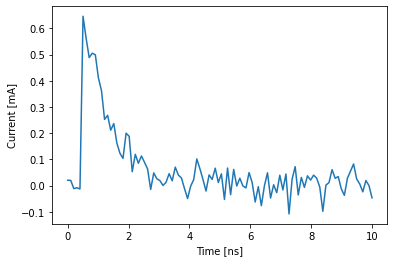

In [138]:
plt.plot(x,y)
plt.xlabel('Time [ns]')
plt.ylabel('Current [mA]')
plt.savefig('example.png', dpi=200)
plt.show()

Agora, em algumas experiências com detectores, a energia é proporcional à corrente integrada, por isso $\text{Energia} \propto \int I(t) dt$

In [139]:
integral = cumulative_trapezoid(y,x, initial=0)

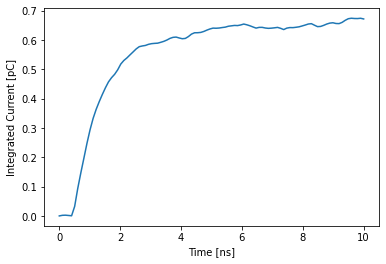

In [140]:
plt.plot(x, integral)
plt.xlabel('Time [ns]')
plt.ylabel('Integrated Current [pC]')
plt.show()

# Series e Sequencias


In [141]:
n = smp.symbols('n')

$$\sum_{n=0}^{\infty} = \dfrac{6}{4^n}$$

In [142]:
smp.Sum(6/4**n, (n,0,smp.oo)).doit()

8

$$\sum_{n=0}^{\infty} = \dfrac{2^{n+1}}{5^n}$$

In [143]:
smp.Sum(2**(n+1) / 5**n, (n,0, smp.oo) ).doit()

10/3

$$\sum_{n=1}^{\infty} = \dfrac{tan^{-1}(n)}{n^{1.1}}$$

.doit() nao retorna o valor diretamente
use .n()

In [144]:
smp.Sum(smp.atan(n)/n**smp.Rational(11, 10),(n,1, smp. oo)).n()       

15.3028821020457

$$\sum_{n=1}^{\infty} = \dfrac{1+cos(n)}{n^2}$$

In [145]:
smp.Sum( (1+smp.cos(n))/n**2, (n,1, smp.oo)).n()

1.969